## WebScraping for British Airlines Customer Reviews

### Link: https://www.airlinequality.com/airline-reviews/british-airways/page/1/

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import os

## Download Data

In [2]:
# add the website link on a variable
url = "https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100"

In [3]:
# put all reviews on 'reviews' list and all ratings on 'ratings' list
reviews = []
ratings = []

#it will search for the next 10 pages
for i in range(1, 10 + 1):

    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for rev in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(rev.get_text())    
    for rat in parsed_content.find_all('div', {"class": 'rating-10'}):
        if 'rating-large' in rat.get('class', []):
            continue
        else: 
            rat_aux = rat.find('span', itemprop='ratingValue')
            ratings.append(rat_aux.get_text().strip())
        

reviews[:3]

["✅ Trip Verified |  LHR - SFO, LAS - LGW August 2023 in Club World. It's a shame that the British Airways experience is split into a mixture of fantastic ground and cabin crew, and dated products and dreadful after service. Our flight to San Francisco was on an A380, the interior of which was showing it's age. Two of our 3 seats had issues, 1 would not recline, the dividing screen to the next seat would not stay up and the other was temperamental with it's recline and the IFE would not respond to the controls. Crew on board were great but the dated and aging product for which top dollar is charged for should have been upgraded years ago. A shame for such a great aircraft. Coming back from Las Vegas to LGW on an tired 777. We were informed at check in that there was an issue with the seats we had pre-booked and paid for and that we would need to be moved. Seats we were moved to were fine and worked. The original seats had people in them and they appeared fine! Flight was late landing a

In [4]:
#verify the lenght of the data
len(reviews)

1000

In [5]:
ratings = list(map(int, ratings))

In [6]:
len(ratings)

1000

In [7]:
# put the list on a data set so we can later manipulate and create train/test dataset
df_reviews = pd.DataFrame()
df_reviews["reviews"] = reviews
df_reviews["ratings"] = ratings
df_reviews

,reviews,ratings
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",3
1,Not Verified | I flew from Malaga via LHR to...,2
2,✅ Trip Verified | Milan to Miami return via L...,1
3,✅ Trip Verified | BA created a new low-cost s...,4
4,✅ Trip Verified | I flew with British Airway...,2
...,...,...
995,"✅ Trip Verified | London City to Zurich, I fl...",9
996,✅ Trip Verified | I booked a flight from Buch...,1
997,✅ Trip Verified | London to Calgary. Thank yo...,10
998,"✅ Trip Verified | Vancouver to London, we wer...",10


In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
 1   ratings  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df_reviews[:15]

,reviews,ratings
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",3
1,Not Verified | I flew from Malaga via LHR to...,2
2,✅ Trip Verified | Milan to Miami return via L...,1
3,✅ Trip Verified | BA created a new low-cost s...,4
4,✅ Trip Verified | I flew with British Airway...,2
5,✅ Trip Verified | Manchester to Copenhagen vi...,6
6,✅ Trip Verified | I have never seen such disr...,1
7,✅ Trip Verified | Paid for a 14 hour long fli...,1
8,✅ Trip Verified | Very inconsiderate PA annou...,1
9,"✅ Trip Verified | Absolutely terrible, lost m...",1


## Data Analysis and Data Cleaning 

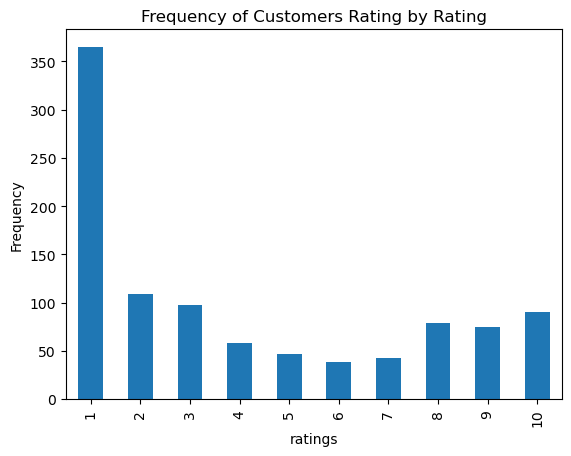

In [10]:
#verify the frequence of rating given by customers. We can noticed there are more customers rating 1 than any other number.
df_reviews.ratings.astype(int).value_counts().sort_index().plot(kind='bar')
plt.title("Frequency of Customers Rating by Rating")
plt.ylabel('Frequency');

In [11]:
import nltk #language
from nltk.corpus import stopwords #Eliminate some os not important word
import string
from nltk.stem import SnowballStemmer

In [12]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #select all in english

stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower() #all text in lower case
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+','',text)# eliminate http
    text = re.sub('<.*?>+','',text) #eliminate punctuation
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('✅ trip verified', '',text)
    text = [word for word in text.split(' ') if word not in  stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df_reviews["reviews_clean"] = df_reviews["reviews"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvidal1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df_reviews

,reviews,ratings,reviews_clean
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August...",3,lhr sfo las lgw august club world shame ...
1,Not Verified | I flew from Malaga via LHR to...,2,verifi flew malaga via lhr boston may arr...
2,✅ Trip Verified | Milan to Miami return via L...,1,milan miami return via london worst busi cl...
3,✅ Trip Verified | BA created a new low-cost s...,4,ba creat new lowcost subsidiari ba eurofly ...
4,✅ Trip Verified | I flew with British Airway...,2,i flew british airway heathrow hannov alth...
...,...,...,...
995,"✅ Trip Verified | London City to Zurich, I fl...",9,london citi zurich fli rout lot around tim...
996,✅ Trip Verified | I booked a flight from Buch...,1,book flight bucharest london return airport...
997,✅ Trip Verified | London to Calgary. Thank yo...,10,london calgari thank jame club world flight...
998,"✅ Trip Verified | Vancouver to London, we wer...",10,vancouv london upgrad busi class airport st...


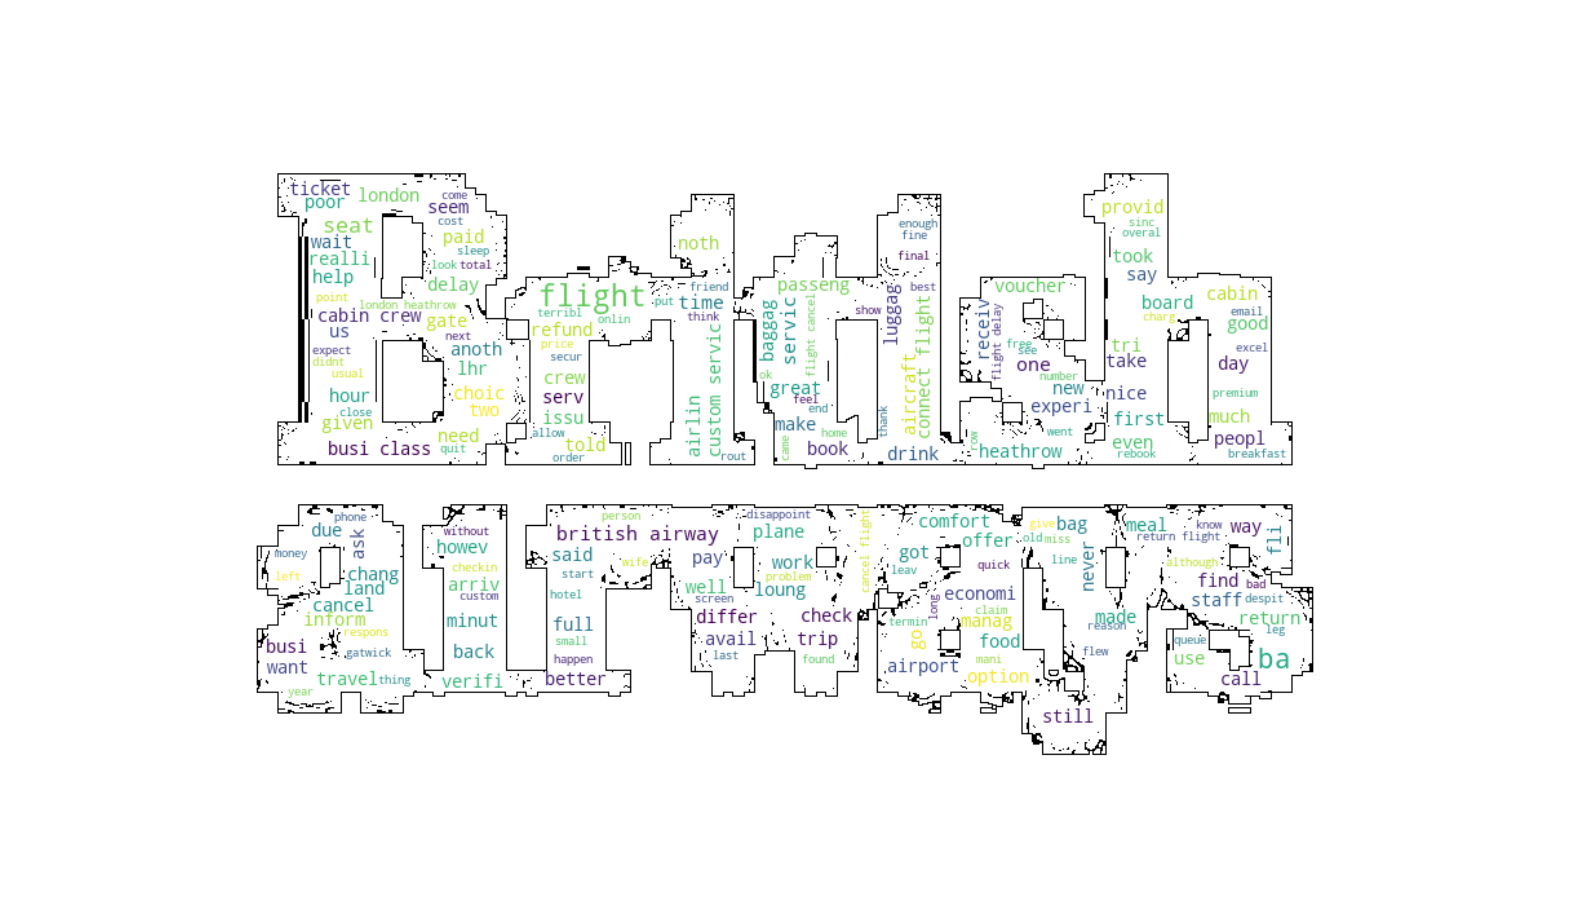

In [14]:
# create a wordCloud with backgroud image
from PIL import Image
from wordcloud import WordCloud

text = ' '.join(df_reviews['reviews_clean'])

# Load mask image
mask_image = np.array(Image.open("British-Airways-Logo-1973.jpg"))

# Create WordCloud object with specific mask
wordcloud = WordCloud(mask=mask_image, background_color="white",contour_color='black', contour_width=1).generate(text)

# Display the generated WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
df_reviews['reviews_clean']

0         lhr  sfo las  lgw august  club world shame ...
1      verifi    flew malaga via lhr boston  may  arr...
2         milan miami return via london worst busi cl...
3         ba creat new lowcost subsidiari ba eurofly ...
4          i flew british airway heathrow hannov alth...
                             ...                        
995       london citi zurich fli rout lot around  tim...
996       book flight bucharest london return airport...
997       london calgari thank jame club world flight...
998       vancouv london upgrad busi class airport st...
999    verifi   \rmiami london heathrow british airwa...
Name: reviews_clean, Length: 1000, dtype: object

In [16]:
# Counts the frequence of each words appear on our dataset
from collections import Counter

def plot_bar(dataset,name):
    # Tokenize the text column into words
    all_words = []
    for text in dataset:
        words = text.lower().split()
        all_words.extend(words)
    
    # Remove punctuation
    all_words = [word.strip(string.punctuation) for word in all_words]
    
    # Remove stopwords and words with less than 3 letters
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in all_words if word not in stop_words and len(word) >= 3]
    
    # Count word frequencies
    word_freq = Counter(filtered_words)
    
    # Get the 10 most common words and their frequencies
    most_common = word_freq.most_common(20)
    print(most_common)
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*most_common))
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f"Top 20 Most Common Words {name}")
    plt.xticks(rotation=45)
    plt.show()


[('flight', 2192), ('seat', 925), ('servic', 769), ('time', 653), ('hour', 581), ('london', 516), ('crew', 457), ('board', 451), ('airlin', 450), ('get', 450), ('busi', 443), ('class', 443), ('food', 440), ('one', 439), ('british', 428), ('good', 428), ('airway', 421), ('staff', 396), ('cabin', 386), ('would', 378)]


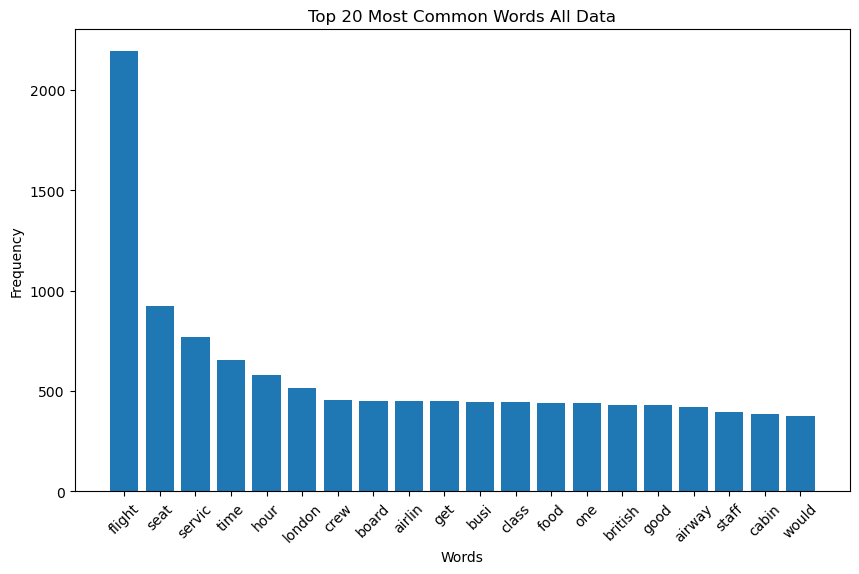

In [17]:
#this is the 20 most commom words on out whole dataset
plot_bar(dataset = df_reviews['reviews_clean'], name = "All Data")

In [18]:
# Manually create a list of words to be deleted
words_to_delete = ['flight', 'seat', 'servic', 'british', 'airway', 'book', 'london', 'airlin', 'time', 'call', 'day', 'told', 'would', 'one', 'airport'
                   , 'crew', 'board', 'cabin', 'arriv', 'seat', 'custom', 'get', 'bag', 'check', 'could', 'travel', 'back', 'class', 'heathrow', 'aircraft']
df_reviews['reviews_clean'] =df_reviews['reviews_clean'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in words_to_delete]))

[('hour', 300), ('cancel', 256), ('delay', 161), ('refund', 149), ('fli', 145), ('staff', 131), ('even', 129), ('never', 126), ('wait', 123), ('tri', 121), ('busi', 120), ('ticket', 116), ('connect', 103), ('chang', 102), ('luggag', 101), ('plane', 101), ('verifi', 100), ('phone', 99), ('rebook', 99), ('email', 97)]


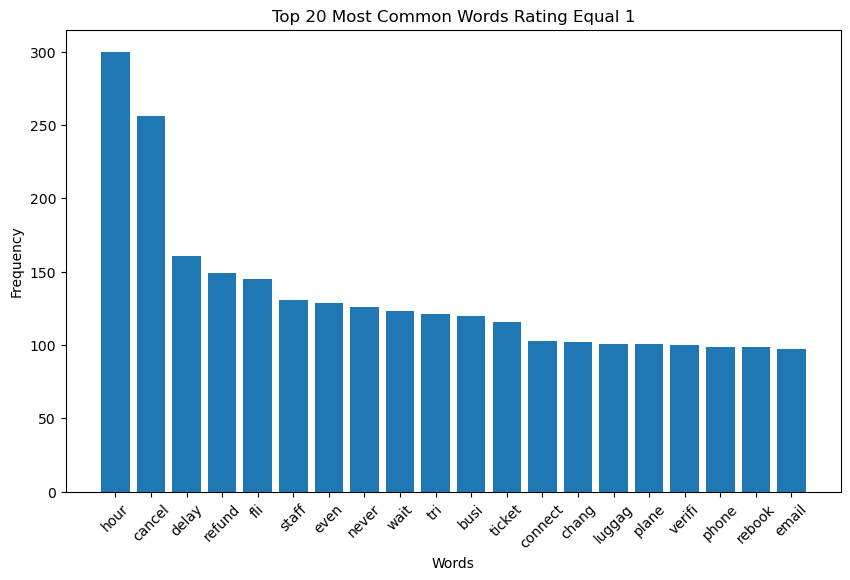

In [19]:
#this is the 20 most common words in our dataset with rating equal 1
df_lower_reviews = df_reviews[df_reviews['ratings']==1]
plot_bar(dataset = df_lower_reviews.reviews_clean, name = "Rating Equal 1")

[('good', 229), ('food', 156), ('great', 90), ('drink', 89), ('busi', 88), ('comfort', 87), ('friend', 86), ('club', 85), ('excel', 82), ('staff', 77), ('loung', 76), ('experi', 74), ('realli', 71), ('first', 70), ('well', 69), ('fli', 67), ('new', 65), ('offer', 61), ('hour', 61), ('help', 59)]


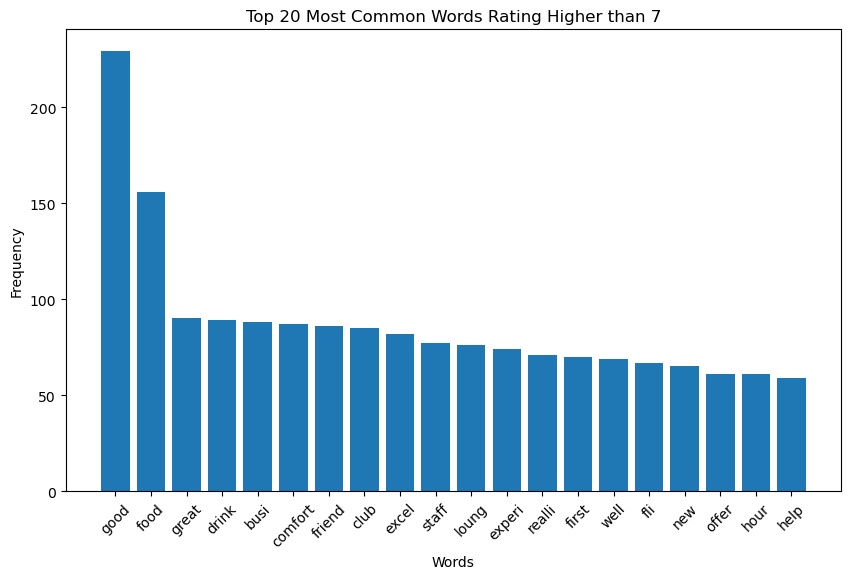

In [20]:
#this is the 20 most common words in our dataset with rating higher than 7
df_lower_reviews = df_reviews[df_reviews['ratings']>7]
plot_bar(dataset = df_lower_reviews.reviews_clean, name = "Rating Higher than 7")

## Data Manipulation

In [21]:
'''
    We are going to create 2 classes:
    Classe 0: all reviews with rating == 1
    Classe 1: all reviews with rating > 7

    This will bring us a more balanced data so we can start to train it.
'''

new_data = df_reviews[(df_reviews['ratings'] == 1) | (df_reviews['ratings'] > 7)]
new_data

,reviews,ratings,reviews_clean
2,✅ Trip Verified | Milan to Miami return via L...,1,milan miami return via worst busi ever layout ...
6,✅ Trip Verified | I have never seen such disr...,1,never seen disrespect month unabl checkin webs...
7,✅ Trip Verified | Paid for a 14 hour long fli...,1,paid hour long ticket includ use inflight ente...
8,✅ Trip Verified | Very inconsiderate PA annou...,1,inconsider pa announc made purser appear decid...
9,"✅ Trip Verified | Absolutely terrible, lost m...",1,absolut terribl lost luggag deliv later smash ...
...,...,...,...
995,"✅ Trip Verified | London City to Zurich, I fl...",9,citi zurich fli rout lot around per year delay...
996,✅ Trip Verified | I booked a flight from Buch...,1,bucharest return inform us delay hour anoth ho...
997,✅ Trip Verified | London to Calgary. Thank yo...,10,calgari thank jame club world attend ba april ...
998,"✅ Trip Verified | Vancouver to London, we wer...",10,vancouv upgrad busi staff absolut delight fabu...


In [22]:
#create a new colunm that rating 1 == bad and rating>7 == good
new_data['rating_category'] = 10
new_data.loc[new_data['ratings'] == 1, 'rating_category'] = 0  # name every bad review as 0
new_data.loc[new_data['ratings'] > 7, 'rating_category'] = 1   # name every good review as 1
new_data

C:\Users\mvidal1\AppData\Local\Temp\ipykernel_768\1968619136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['rating_category'] = 10


,reviews,ratings,reviews_clean,rating_category
2,✅ Trip Verified | Milan to Miami return via L...,1,milan miami return via worst busi ever layout ...,0
6,✅ Trip Verified | I have never seen such disr...,1,never seen disrespect month unabl checkin webs...,0
7,✅ Trip Verified | Paid for a 14 hour long fli...,1,paid hour long ticket includ use inflight ente...,0
8,✅ Trip Verified | Very inconsiderate PA annou...,1,inconsider pa announc made purser appear decid...,0
9,"✅ Trip Verified | Absolutely terrible, lost m...",1,absolut terribl lost luggag deliv later smash ...,0
...,...,...,...,...
995,"✅ Trip Verified | London City to Zurich, I fl...",9,citi zurich fli rout lot around per year delay...,1
996,✅ Trip Verified | I booked a flight from Buch...,1,bucharest return inform us delay hour anoth ho...,0
997,✅ Trip Verified | London to Calgary. Thank yo...,10,calgari thank jame club world attend ba april ...,1
998,"✅ Trip Verified | Vancouver to London, we wer...",10,vancouv upgrad busi staff absolut delight fabu...,1


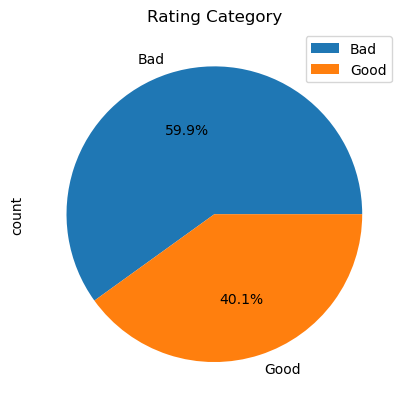

In [23]:
new_data.rating_category.value_counts().plot(kind = 'pie',legend=True, labels=['Bad','Good'],autopct='%1.1f%%')
plt.title("Rating Category");

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 2 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews          609 non-null    object
 1   ratings          609 non-null    int64 
 2   reviews_clean    609 non-null    object
 3   rating_category  609 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.8+ KB


## Apply Machine Learning

In [25]:
#shuffle table
new_data = new_data.sample(frac=1).reset_index(drop=True)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = np.array(new_data['reviews_clean'])
y = np.array(new_data['rating_category'])

cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.20)

In [27]:
y_train.shape, y_test.shape

((487,), (122,))

In [28]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [31]:
# Add by the user:
user = input('Enter your review: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
rating_pred = "Good Review" if output == 1 else "Bad Review"
print(rating_pred)

Enter your review:  I had a good time flying to London. The crew was great, and the food was delicious.


Good Review


In [33]:
# Add by the user:
user = input('Enter your review: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
rating_pred = "Good Review" if output == 1 else "Bad Review"
print(rating_pred)

Enter your review:  I had an horrible time flying to London. The crew were not polite and the food taste terrible.


Bad Review
